In [1]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [24]:
gdp = web.DataReader(name='GDP', data_source='fred', start='1990-01-01')
gdp

,GDP
DATE,
1990-01-01,5872.701
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178
...,...
2023-10-01,28296.967
2024-01-01,28624.069
2024-04-01,29016.714


,GDP
DATE,
1990Q1,5872.701
1990Q2,5960.028
1990Q3,6015.116
1990Q4,6004.733
1991Q1,6035.178
...,...
2023Q4,28296.967
2024Q1,28624.069
2024Q2,29016.714


In [16]:
y = np.log(gdp)

<Axes: xlabel='DATE'>

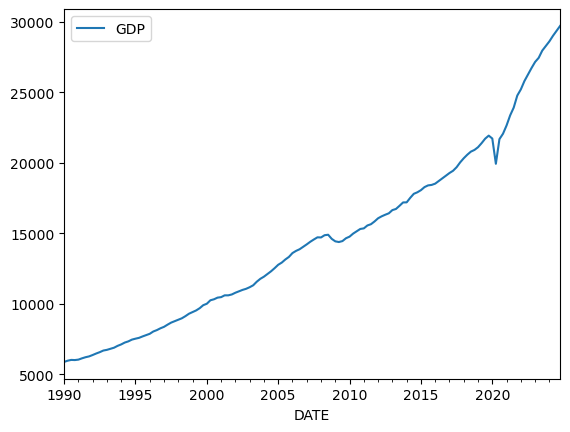

In [5]:
gdp.plot()

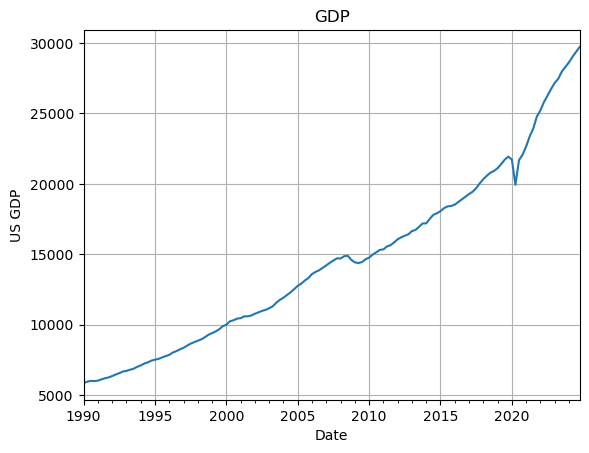

In [6]:
ax = gdp.plot(title='GDP')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

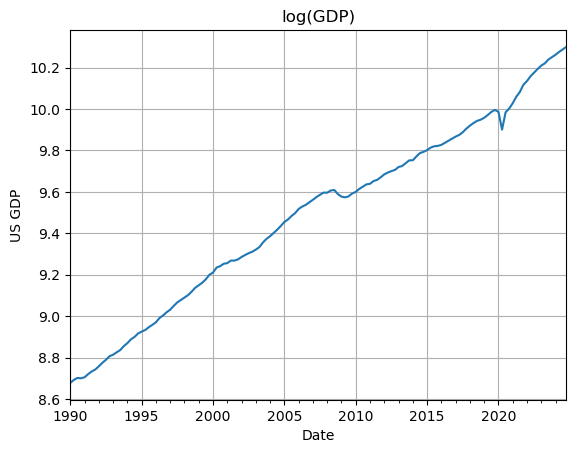

In [7]:
ax = y.plot(title='log(GDP)')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [8]:
y.diff()

,GDP
DATE,
1990Q1,NaN
1990Q2,0.014761
1990Q3,0.009200
1990Q4,-0.001728
1991Q1,0.005057
...,...
2023Q4,0.011704
2024Q1,0.011493
2024Q2,0.013624


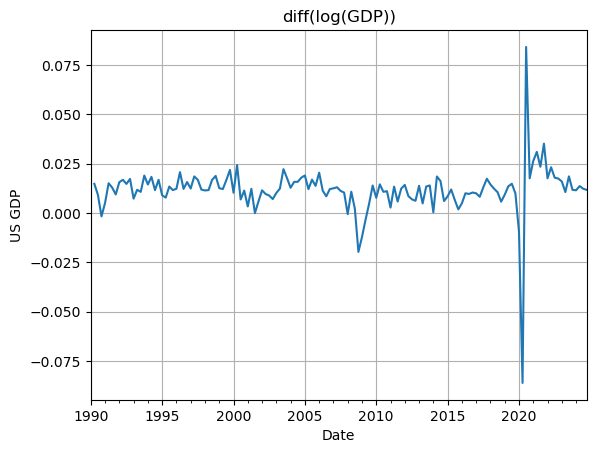

In [9]:
ax = y.diff().plot(title='diff(log(GDP))')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [10]:
y.diff().diff()

,GDP
DATE,
1990Q1,NaN
1990Q2,NaN
1990Q3,-0.005560
1990Q4,-0.010928
1991Q1,0.006785
...,...
2023Q4,-0.006841
2024Q1,-0.000211
2024Q2,0.002131


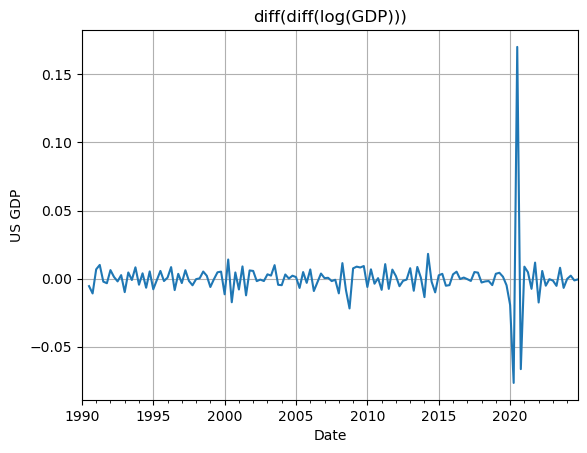

In [11]:
ax = y.diff().diff().plot(title='diff(diff(log(GDP)))')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [12]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

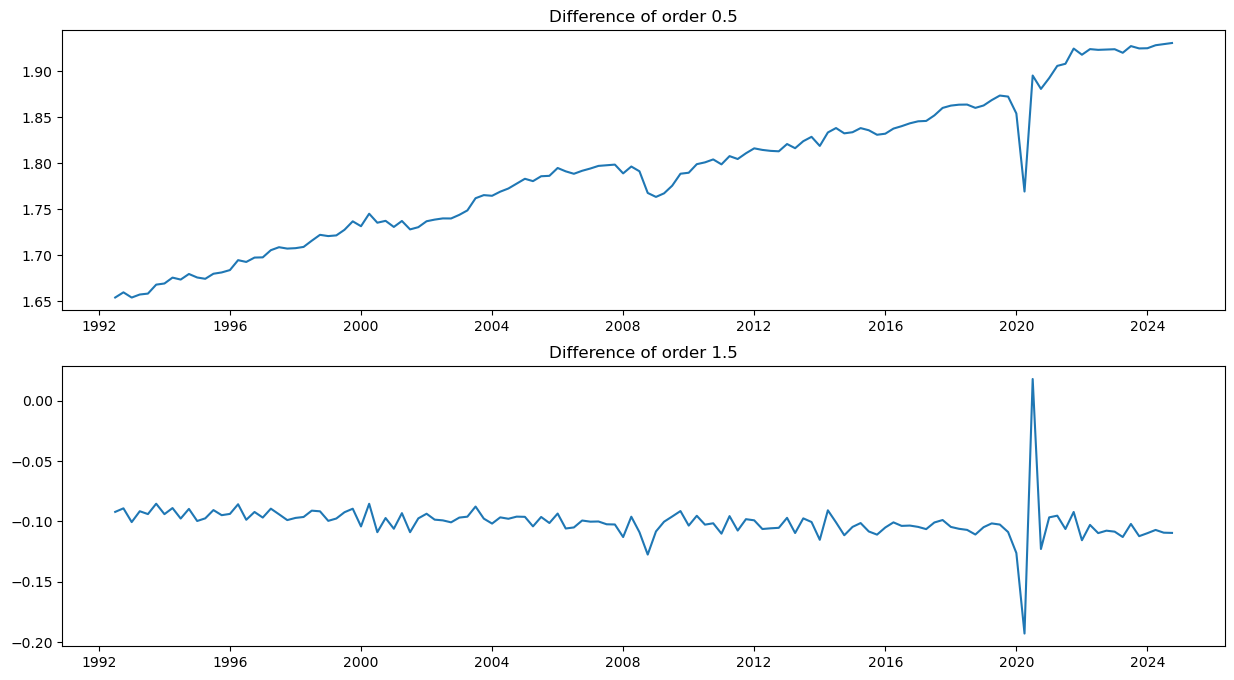

In [17]:
differences=[0.5, 1.5]
win_size = 10

# исходный ряд
fig, axs = plt.subplots(len(differences),1,figsize=(15,4*len(differences)))

for i in range(len(differences)):
	axs[i].plot(ts_differencing(y, differences[i], win_size))
	axs[i].set_title(f'Difference of order {differences[i]}')

plt.show()

In [19]:
rates = web.DataReader(name=['TB3MS', 'TB1YR', 'GS10'], data_source='fred',start='1990-01')
rates

,TB3MS,TB1YR,GS10
DATE,,,
1990-01-01,7.64,7.38,8.21
1990-02-01,7.74,7.55,8.47
1990-03-01,7.90,7.76,8.59
1990-04-01,7.77,7.80,8.79
1990-05-01,7.74,7.73,8.76
...,...,...,...
2024-10-01,4.51,4.03,4.10
2024-11-01,4.42,4.14,4.36
2024-12-01,4.27,4.05,4.39


In [20]:
# переопределяем индекс
rates.index = rates.index.to_period(freq='M')
# переименовываем переменные/столбцы
rates.columns = ['3M_rate', '1Y_rate', '10Y_rate']
rates

,3M_rate,1Y_rate,10Y_rate
DATE,,,
1990-01,7.64,7.38,8.21
1990-02,7.74,7.55,8.47
1990-03,7.90,7.76,8.59
1990-04,7.77,7.80,8.79
1990-05,7.74,7.73,8.76
...,...,...,...
2024-10,4.51,4.03,4.10
2024-11,4.42,4.14,4.36
2024-12,4.27,4.05,4.39


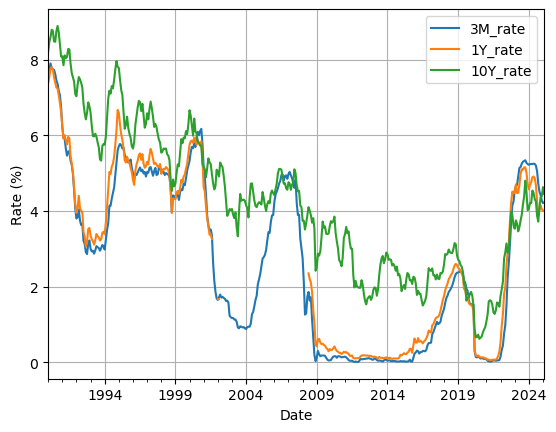

In [21]:
ax = rates.plot()

ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')
ax.grid()

plt.show()

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

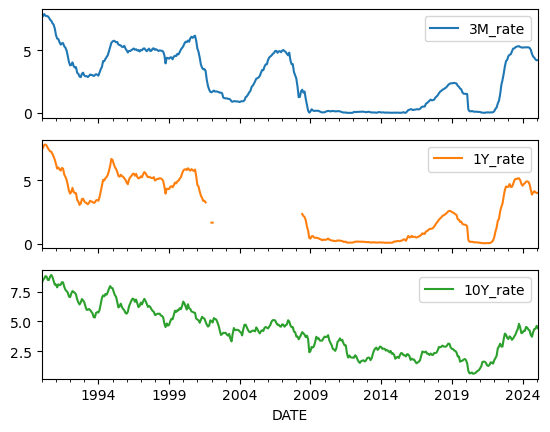

In [22]:
rates.plot(subplots=True)